# Estabilidad y Rigidez en Métodos Numéricos para EDOs

## Ecuación de prueba y región de estabilidad

La **ecuación de prueba lineal** es
$$
y'(t)=\lambda y(t), \qquad \lambda\in\mathbb{C}, \qquad y(0)=y_0.
$$
Su solución es $ y(t)=\mathrm{e}^{\lambda t}y_0 $.

Al aplicar un método de un paso resulta una **iteración lineal**
$$
y_{n+1} = R(z)\,y_n, \qquad z=h\lambda,
$$
donde $ R(z) $ es la **función de amplificación**. La **región de estabilidad**
es el conjunto $ \{\, z\in\mathbb{C} : |R(z)|<1 \,\} $.  
Nos interesa especialmente el **semiplano izquierdo** $ \{ \Re(z)<0 \} $ porque
allí la solución exacta decae y un buen método debe reproducir ese decaimiento.

## A–estabilidad y L–estabilidad

- Un método es **A–estable** si $ |R(z)|<1 $ para todo $ \Re(z)<0 $.
- Es **L–estable** si además $ \lim_{z\to -\infty} R(z)=0 $.  
  Esto elimina numéricamente los modos muy rígidos.

**Ejemplos:**
- Euler explicito: $ R(z)=1+z $ → no A–estable.  
- Euler implicito: $ R(z)=1/(1-z) $ → **A–estable** y **L–estable**.  
- Trapecio implicito: $ R(z)=(1+z/2)/(1-z/2) $ → **A–estable** pero no L–estable (no apaga del todo el modo rígido).

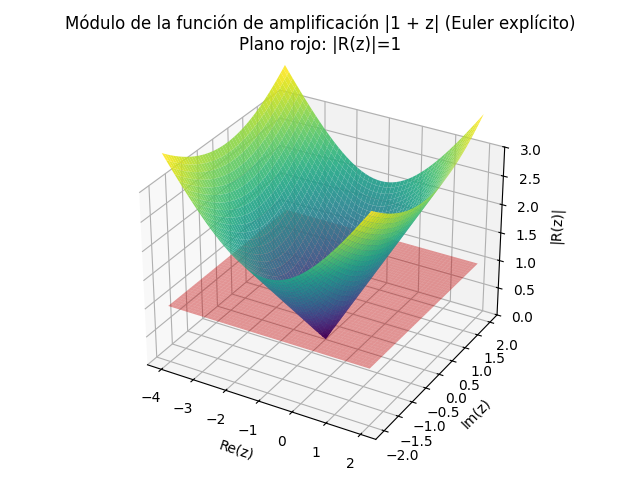

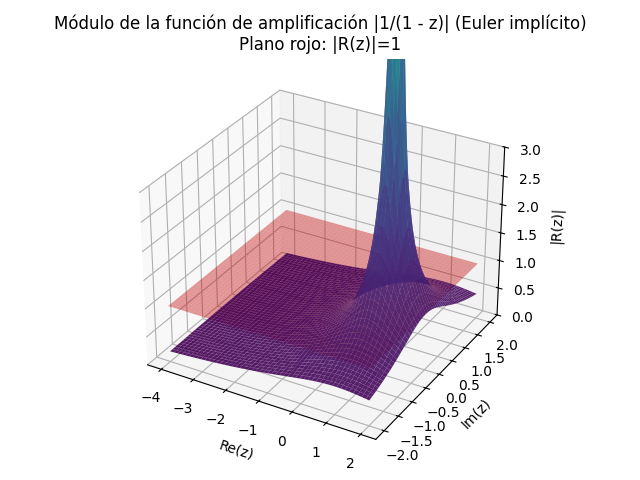

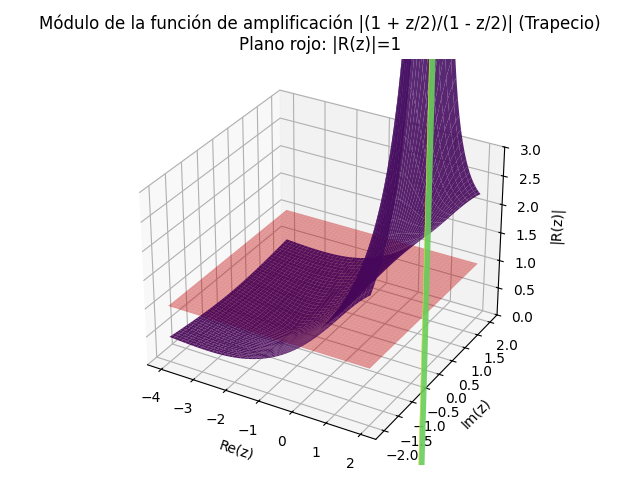

In [11]:
# Superficies 3D del módulo de la función de amplificación
# para Euler explícito (R(z)=1+z) y Euler implícito (R(z)=1/(1-z)).
# Mostramos |R(z)| como altura en (Re z, Im z, |R(z)|),
# y agregamos el plano z=1 para visualizar la región estable.

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Mallado en el plano complejo z = x + i y
x = np.linspace(-4, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Funciones de amplificación y su módulo
R_explicit = 1 + Z
mod_explicit = np.abs(R_explicit)

R_implicit = 1/(1 - Z)
mod_implicit = np.abs(R_implicit)

R_trapecio = (1 + Z/2)/(1 - Z/2)
mod_trapecio = np.abs(R_trapecio)

# Evitar la singularidad en z=1 para la superficie implícita
mask = np.abs(1 - Z) < 0.05
mod_implicit_masked = np.where(mask, np.nan, mod_implicit)

# --- Gráfica: Euler explícito ---
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, mod_explicit, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)
# Plano z=1
ax1.plot_surface(X, Y, np.ones_like(X), color='red', alpha=0.4)
ax1.set_zlim(0, 3)
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_zlabel('|R(z)|')
ax1.set_title('Módulo de la función de amplificación |1 + z| (Euler explícito)\nPlano rojo: |R(z)|=1')
plt.tight_layout()
plt.show()

# --- Gráfica: Euler implícito ---
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
# Plano z=1
ax2.plot_surface(X, Y, np.ones_like(X), color='red', alpha=0.4)
# Superficie |R(z)|
ax2.plot_surface(X, Y, mod_implicit_masked, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)
ax2.set_zlim(0, 3)
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.set_zlabel('|R(z)|')
ax2.set_title('Módulo de la función de amplificación |1/(1 - z)| (Euler implícito)\nPlano rojo: |R(z)|=1')
plt.tight_layout()
plt.show()

# --- Gráfica: Trapecio ---
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
# Plano z=1
ax3.plot_surface(X, Y, np.ones_like(X), color='red', alpha=0.4)
# Superficie |R(z)|
ax3.plot_surface(X, Y, mod_trapecio, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)
ax3.set_zlim(0, 3)
ax3.set_xlabel('Re(z)') 
ax3.set_ylabel('Im(z)')
ax3.set_zlabel('|R(z)|')
ax3.set_title('Módulo de la función de amplificación |(1 + z/2)/(1 - z/2)| (Trapecio)\nPlano rojo: |R(z)|=1')
plt.tight_layout()
plt.show()


## Estrategia de **Predictor–Corrector** con múltiples iteraciones

En los métodos **implícitos**, la nueva incógnita $y_{n+1}$ aparece dentro de la función $f$:

$$
y_{n+1} = y_n + h\, f(t_{n+1}, y_{n+1}),
$$

lo que exige resolver una ecuación **no lineal** en cada paso.  
Una forma general de evitar resolverla exactamente (por ejemplo, con Newton) es usar el esquema **Predictor–Corrector iterativo**.


### Idea básica

1. **Predicción (predictor):**  
   Se obtiene una primera estimación $y_{n+1}^{(0)}$ usando un método **explícito** sencillo, por ejemplo Euler explícito:
   $$
   y_{n+1}^{(0)} = y_n + h\, f(t_n, y_n).
   $$
   Esta predicción sirve como punto de partida para refinar el valor implícito.

2. **Corrección (corrector):**  
   Se sustituye la predicción en la ecuación implícita y se recalcula repetidamente:
   $$
   y_{n+1}^{(m+1)} = y_n + h\, f(t_{n+1},\, y_{n+1}^{(m)}),
   $$
   donde $m=0,1,2,\dots,k-1$ indica el número de iteraciones de corrección.

3. **Resultado final:**  
   Después de $k$ iteraciones, tomamos
   $$
   y_{n+1} \approx y_{n+1}^{(k)}.
   $$


### Interpretación

- Cada corrección **acerca la solución** a la que cumpliría exactamente la ecuación implícita.  
- Si el paso $h$ es pequeño o la ecuación no es muy no lineal, **pocas iteraciones** (2–3) bastan.  
- En el límite $k\to\infty$, el proceso converge a la solución del **método implícito exacto** (por ejemplo, Euler inverso).  
- Con $k=0$, el método se reduce al **predictor explícito**.


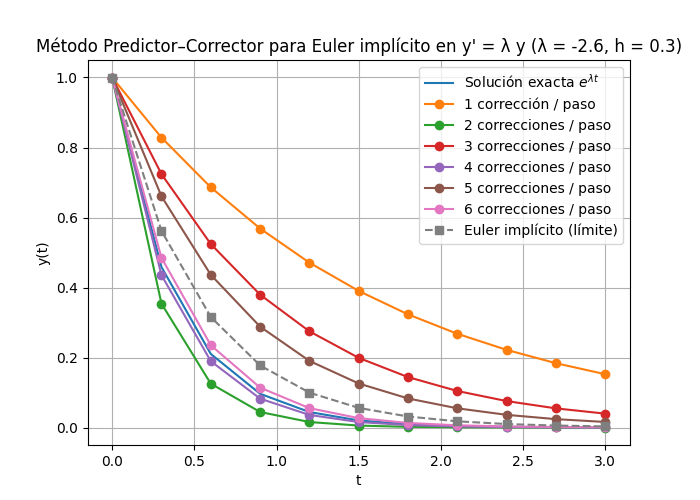

In [13]:
# Demostración del método Predictor–Corrector aplicado a y' = λ y
# Se comparan una, dos, tres y cuatro iteraciones de corrección por paso
# utilizando iteraciones de punto fijo para aproximar el método de Euler implícito.

import numpy as np
import matplotlib.pyplot as plt

# --- Configuración del problema ---
lam = -2.6          # Valor de λ
y0 = 1.0            # Condición inicial
T = 3.0             # Tiempo final
h = 0.3             # Tamaño de paso (|hλ| < 1 asegura convergencia del corrector de punto fijo)
N = int(T / h)      # Número total de pasos
t = np.linspace(0, N*h, N+1)  # Malla temporal

# --- Solución exacta (analítica) ---
y_exacta = y0 * np.exp(lam * t)

def paso_euler_implicito_punto_fijo(y_n, h, lam, n_correcciones):
    """
    Realiza un paso del método de Euler implícito resuelto mediante
    iteraciones de Predictor–Corrector (punto fijo).
    
    Predictor:  y^(0) = y_n + h * f(t_n, y_n) = y_n + h * λ * y_n
    Corrector:  y^(k+1) = y_n + h * λ * y^(k),  para k = 0,...,n_correcciones-1
    
    Devuelve: y_{n+1}^{(n_correcciones)}.
    """
    yk = y_n + h * lam * y_n  # Predictor (Euler explícito)
    for _ in range(n_correcciones):  # Aplica 1, 2, 3, 4,... correcciones
        yk = y_n + h * lam * yk
    return yk

def resolver_con_k_correcciones(K):
    """Resuelve el problema usando K correcciones por paso."""
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = paso_euler_implicito_punto_fijo(y[n], h, lam, K)
    return y

# --- Cálculo de las soluciones con distintas correcciones ---
y_k1 = resolver_con_k_correcciones(1)
y_k2 = resolver_con_k_correcciones(2)
y_k3 = resolver_con_k_correcciones(3)
y_k4 = resolver_con_k_correcciones(4)
y_k5 = resolver_con_k_correcciones(5)
y_k6 = resolver_con_k_correcciones(6)

# --- Solución del Euler implícito exacto ---
# Resuelve y_{n+1} = y_n + h * λ * y_{n+1}
# => y_{n+1} = y_n / (1 - hλ)
y_implicito = np.zeros(N+1)
y_implicito[0] = y0
for n in range(N):
    y_implicito[n+1] = y_implicito[n] / (1 - h * lam)

# --- Gráficas de las trayectorias ---
plt.figure(figsize=(7,5))
plt.plot(t, y_exacta, label="Solución exacta $e^{λt}$")
plt.plot(t, y_k1, marker="o", linestyle="-", label="1 corrección / paso")
plt.plot(t, y_k2, marker="o", linestyle="-", label="2 correcciones / paso")
plt.plot(t, y_k3, marker="o", linestyle="-", label="3 correcciones / paso")
plt.plot(t, y_k4, marker="o", linestyle="-", label="4 correcciones / paso")
plt.plot(t, y_k5, marker="o", linestyle="-", label="5 correcciones / paso")
plt.plot(t, y_k6, marker="o", linestyle="-", label="6 correcciones / paso")
plt.plot(t, y_implicito, marker="s", linestyle="--", label="Euler implícito (límite)")
plt.title("Método Predictor–Corrector para Euler implícito en y' = λ y (λ = -2.6, h = 0.3)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


## Comparación A–estabilidad / L–estabilidad

Considera el problema lineal rígido
$$
y'(t)=\lambda\,y(t),\qquad \lambda<0,
$$
y el paso numérico con tamaño $h$. Para métodos de 1 paso, la evolución se describe por
$$
y_{n+1} \;=\; R(z)\,y_n,\qquad z:=h\lambda,
$$
donde $R(z)$ es la **función de amplificación** del método.

### Funciones de amplificación
- **Euler implícito**:
$$
R_{\text{EI}}(z)=\frac{1}{1-z}.
$$
- **Trapecio implícito**:
$$
R_{\text{TRP}}(z)=\frac{1+\tfrac{z}{2}}{\,1-\tfrac{z}{2}\,}.
$$

Consideremos $\lambda=-1000$ y $z=h\lambda=-80$ (esto es, $h=0.08$). Entonces:
- $R_{\text{EI}}(-80)=\frac{1}{1-(-80)}=\frac{1}{81}\approx 0.0123>0$ (positivo y muy pequeño).
- $R_{\text{TRP}}(-80)=\dfrac{1-40}{1+40}=\dfrac{-39}{41}\approx -0.9512$ (**negativo** y de módulo $<1$).


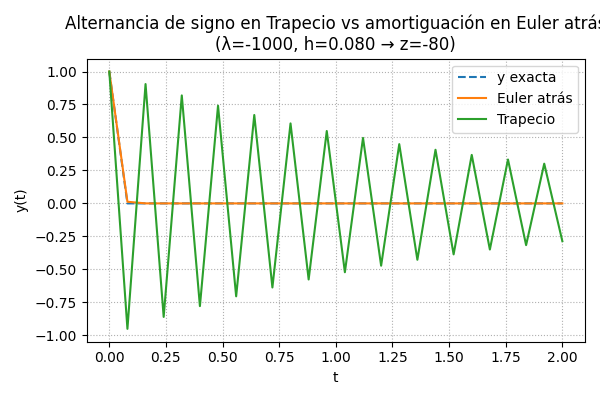

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
lam = -1000.0       # λ
z = -80.0           # z = hλ
h = z / lam         # tamaño de paso
y0 = 1.0            # condición inicial
t_end = 2.0         # tiempo final
N = int(np.ceil(t_end / h))  # número de pasos
t = np.linspace(0, N*h, N+1) # malla temporal

# Solución exacta y funciones de amplificación
y_exact = y0 * np.exp(lam * t)
R_back = 1.0 / (1.0 - z)                 # Euler hacia atrás
R_trp  = (1.0 + 0.5*z) / (1.0 - 0.5*z)  # Trapecio

# Evolución de cada método
y_back = np.zeros(N+1)
y_trp  = np.zeros(N+1)
y_back[0] = y_trp[0] = y0

for n in range(N):
    y_back[n+1] = R_back * y_back[n]
    y_trp[n+1]  = R_trp  * y_trp[n]

# --- Gráfica de alternancia de signo ---
plt.figure(figsize=(6,4))
plt.plot(t, y_exact, '--', label='y exacta')
plt.plot(t, y_back,  label='Euler atrás')
plt.plot(t, y_trp,   label='Trapecio')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Alternancia de signo en Trapecio vs amortiguación en Euler atrás\n'+f'(λ={lam:.0f}, h={h:.3f} → z={z:.0f})')
plt.grid(True, ls=':')
plt.legend()
plt.tight_layout()
plt.show()



### A–estabilidad vs L–estabilidad

- **A–estabilidad**: un método es A–estable si su región de estabilidad contiene todo el semiplano izquierdo $\{z\in\mathbb{C}: \Re z\le 0\}$.  
  Tanto **Euler hacia atrás** como **Trapecio** son **A–estables**: para cualquier $\lambda$ con $\Re\lambda\le 0$ y cualquier $h>0$, se tiene $|R(z)|\le 1$.

- **L–estabilidad**: además de A–estable, un método es L–estable si **elimina los modos muy rígidos**, es decir,
$$
\lim_{z\to -\infty} R(z)=0.
$$
  - **Euler hacia atrás** **sí es L–estable**: $\displaystyle \lim_{z\to -\infty} R_{\text{BE}}(z)=\lim_{z\to -\infty}\frac{1}{1-z}=0$.  
    Interpreta: los modos con $|z|$ grande (muy rápidos) se **apagan** numéricamente sin oscilar.
  - **Trapecio** **no es L–estable**: $\displaystyle \lim_{z\to -\infty} R_{\text{TRP}}(z)=\lim_{z\to -\infty}\frac{1+\tfrac{z}{2}}{1-\tfrac{z}{2}}=-1$.  
    Interpreta: los modos muy rígidos **no se amortiguan a 0**; quedan con módulo cercano a 1 y **cambian de signo** en cada paso ($R\approx -1$), provocando la **alternancia** observada.


### ¿Por qué hay alternancia de signo?
Porque con Trapecio $R_{\text{TRP}}(z)<0$ para $z<-2$. En ese régimen rígido, cada paso **cambia el signo** de $y_n$ (ya que se multiplica por un número negativo) y, como $|R_{\text{TRP}}(z)|<1$, la sucesión **oscila con signo alternado** pero con **amplitud decreciente**:
$$
y_n \;=\; \big(R_{\text{TRP}}(z)\big)^n\,y_0 \;\;\text{con}\;\; R_{\text{TRP}}(z)\approx -0.95.
$$
De ahí los puntos que cruzan el eje horizontal en la gráfica.

En cambio, con Euler implicito $R_{\text{EI}}(z)>0$ y muy pequeño, por lo que **no hay inversión de signo** y la solución numérica **se amortigua** fuertemente hacia cero:
$$
y_n \;=\; \big(R_{\text{EI}}(z)\big)^n\,y_0,\qquad R_{\text{EI}}(-80)\approx 0.0123.
$$

>- En problemas **rígidos** ($|z|=|h\lambda|$ grande), **Trapecio** (aunque A–estable) puede producir **oscilaciones numéricas** de signo alternado.  
>- **Euler hacia atrás**, al ser **L–estable**, amortigua esos modos rígidos sin oscilaciones, lo que explica la diferencia visual en tu figura: **Trapecio alterna signo**, **Euler atrás** cae suavemente a cero.


## Rigidez (*stiffness*) y ecuación canónica

Un modelo lineal canónico de rigidez es
$$
y'(t)=\lambda\,(y(t)-g(t)) + g'(t), \qquad \lambda\ll 0.
$$
**Intuición.** El término $ \lambda(y-g) $ actúa como un **resorte muy rígido** que empuja a $y$ hacia $g$ a gran velocidad;
$g'(t)$ asegura que si $y=g$ entonces la ecuación se satisface.

**Solución por factor integrante.** Reescribiendo
$ y'(t)-\lambda y(t)=g'(t)-\lambda g(t) $ y multiplicando por $ \mathrm{e}^{-\lambda t} $,
se obtiene
$$
\frac{d}{dt}\!\big(\mathrm{e}^{-\lambda t}y(t)\big)=\frac{d}{dt}\!\big(\mathrm{e}^{-\lambda t}g(t)\big)
\;\Rightarrow\;
y(t)=g(t)+\mathrm{e}^{\lambda t}\big(y_0-g(0)\big).
$$

La solución tiene:
- **modo rápido** $ \mathrm{e}^{\lambda t}(y_0-g(0)) $ (transitorio),
- **modo lento** $ g(t) $.

# Modelo de Difusión de **Bass**

## Planteamiento e interpretación del modelo de Bass

El **modelo de Bass** (1969) describe el proceso de adopción de una innovación dentro de un mercado potencial de tamaño $M > 0$.  
El objetivo es modelar la **evolución temporal del número acumulado de adoptantes** $A(t)$, suponiendo que la tasa de adopción depende de dos mecanismos:

$$
\frac{dA}{dt} \;=\; \big(p + q\,\tfrac{A}{M}\big)\,\big(M - A\big), 
\qquad A(0) = A_0.
$$

donde:

- **$p$** es el *coeficiente de innovación* o **influencia externa**: representa la probabilidad de que un individuo adopte el producto **sin influencia social**, por ejemplo por publicidad, comunicación masiva o interés propio.  
- **$q$** es el *coeficiente de imitación* o **influencia interna**: mide el efecto de la **presión social** o contagio. A medida que más individuos adoptan, aumenta la probabilidad de que los restantes lo hagan.  
- **$M$** es el tamaño total del mercado (número total de adoptantes potenciales).  
- **$A(t)$** representa el número acumulado de adoptantes hasta el instante $t$.  
- **$M - A(t)$** son los *no adoptantes* o consumidores potenciales restantes.

### Interpretación de la ecuación diferencial

La ecuación

$$
\frac{dA}{dt} = (p + q \tfrac{A}{M})(M - A)
$$

puede verse como una **suma de dos efectos**:

$$
\frac{dA}{dt} = \underbrace{p(M-A)}_{\text{Innovadores}} 
+ \underbrace{(q\tfrac{A}{M})(M-A)}_{\text{Imitadores}}.
$$

- El primer término **$p(M-A)$** describe la *adopción por innovación*:  
  Cada individuo que aún no adopta $(M-A)$ tiene probabilidad $p$ de hacerlo de forma independiente.  

- El segundo término **$(q A/M)(M-A)$** representa la *adopción por imitación*:  
  Los adoptantes existentes $A$ “contactan” con los no adoptantes $(M-A)$ y los convencen de adoptar, con tasa proporcional $q$.

De este modo, el modelo combina una **difusión externa (innovación)** y una **difusión interna (imitación)**.

### Versión en fracción adoptante

Es útil expresar el modelo en términos de la **fracción de adopción**:

$$
F(t) \;=\; \frac{A(t)}{M} \;\in [0,1],
$$
de modo que:

$$
\frac{dF}{dt} \;=\; (p + q F)\,(1 - F),
\qquad F(0)=F_0 = \frac{A_0}{M}.
$$

Aquí $(1-F)$ representa la fracción de población que aún no ha adoptado.


###  Forma y significado de las curvas

El modelo predice una **curva en forma de S** para $A(t)$:

- Al principio ($t \approx 0$), pocos individuos adoptan; la tasa de crecimiento es pequeña y dominada por los **innovadores** ($p$).  
- Conforme aumentan los adoptantes, crece la influencia social ($q$), **acelerando** la adopción.  
- Finalmente, a medida que $A(t) \to M$, la población de no adoptantes $(M-A)$ disminuye, y la adopción se **ralentiza** hasta saturarse.

La derivada $\dot{A}(t) = dA/dt$ representa la **tasa de adopción instantánea**, es decir, el número de *nuevos adoptantes por unidad de tiempo*.  
Su gráfica tiene una forma **unimodal (campana)**: primero crece, alcanza un máximo y luego decrece.


### Curvas de innovación e imitación

Podemos separar la tasa total de adopción:

$$
a(t) = \frac{dA}{dt} = a_{\text{innovación}}(t) + a_{\text{imitación}}(t),
$$
con
$$
a_{\text{innovación}}(t) = p(M-A), 
\qquad
a_{\text{imitación}}(t) = (q \tfrac{A}{M})(M-A).
$$

- La **curva de innovación** $a_{\text{innovación}}(t)$ **disminuye** con el tiempo, porque a medida que hay más adoptantes, quedan menos individuos “independientes” por convencer.  
- La **curva de imitación** $a_{\text{imitación}}(t)$ primero **aumenta**, alcanza un máximo (cuando hay un balance entre adoptantes y no adoptantes), y luego **disminuye** conforme se agota el mercado.  
- La **tasa total** $a(t)$ es la suma de ambas y presenta una **forma de campana**, cuyo pico indica el momento de adopción más intensa.


### Influencia de los parámetros

#### Variación de $p$ (innovación)

- Si $p$ **aumenta**, el modelo arranca más rápido: los innovadores impulsan una adopción temprana, y la curva $A(t)$ sube antes.  
- Si $p$ **disminuye**, el proceso depende más de la imitación: la curva se retrasa y la fase inicial es más lenta.

#### Variación de $q$ (imitación)

- Si $q$ **aumenta**, la curva se vuelve más **pronunciada**: tras un inicio lento, la imitación provoca un crecimiento más explosivo y un pico de adopción mayor.  
- Si $q$ **disminuye**, el crecimiento es más suave y puede no exhibir una forma de S tan marcada.

#### Efecto combinado

- Un **alto $p$ y bajo $q$** → adopción rápida pero lineal (innovación domina).  
- Un **bajo $p$ y alto $q$** → adopción lenta al inicio, pero con crecimiento rápido después (imitación domina).  
- Cuando **$p$ y $q$ son comparables**, la curva de adopción es balanceada y de tipo S clásica.

### Solución analítica

La solución exacta para $A(t)$ es:

$$
A(t) = M \, \frac{1 - C e^{-(p+q)t}}{1 + (q/p) C e^{-(p+q)t}}, 
\quad 
C = \frac{1 - A_0/M}{1 + (q/p)(A_0/M)}.
$$

- Al inicio ($t=0$): $A(0)=A_0$.  
- Cuando $t \to \infty$: $A(t) \to M$, es decir, todo el mercado adopta eventualmente.  
- El punto de **máxima tasa de adopción** ocurre cuando:
  $$
  F(t^*) = \frac{1 - p/q}{2},
  \quad \text{o bien} \quad 
  t^* = \frac{1}{p+q} \ln\!\left(\frac{q}{p}\right).
  $$
  Ese $t^*$ marca el **pico de difusión**: la mitad de los adoptantes ya adoptaron, y la otra mitad lo hará después.

## Implementación numérica

In [17]:
# Interactivo Bass: adopción acumulada y descomposición de nuevos adoptantes
# - Sliders: p, q, A0, h, k, T
# - Dos integradores: Euler explícito y Euler implícito (Predictor–Corrector k-iter)
# - Figura 1: A(t) acumulada (explícito vs implícito vs EXACTA)
# - Figura 2: Nuevos adoptantes por unidad de tiempo a(t) y su descomposición
#
# Requisitos: ipywidgets, matplotlib, numpy

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# ---------------------------
# Modelo y utilidades numéricas
# ---------------------------

def f_bass(t, A, p, q, M):
    """dA/dt = (p + q A/M) (M - A)."""
    return (p + q * (A / M)) * (M - A)

def euler_explicito(A0, T, h, p, q, M):
    N = int(np.ceil(T / h))
    t = np.linspace(0.0, N * h, N + 1)
    A = np.zeros(N + 1)
    A[0] = A0
    for n in range(N):
        A[n+1] = A[n] + h * f_bass(t[n], A[n], p, q, M)
        # Si quieres "ver explotar" explícito, deja SIN clip:
        # if A[n+1] < 0.0: A[n+1] = 0.0
        # if A[n+1] > M:   A[n+1] = M
    return t, A

def euler_implicito_pc(A0, T, h, p, q, M, k=3):
    """
    Euler implícito mediante iteración predictor–corrector (k iteraciones por paso):
        Predictor:  A^{(0)} = A_n + h f(t_n, A_n)
        Corrector:  A^{(m+1)} = A_n + h f(t_{n+1}, A^{(m)}), m=0,...,k-1
    Proyección a [0,M] durante la corrección para robustez.
    """
    N = int(np.ceil(T / h))
    t = np.linspace(0.0, N * h, N + 1)
    A = np.zeros(N + 1)
    A[0] = A0
    for n in range(N):
        An = A[n]
        # Predictor (Euler explícito)
        x = An + h * f_bass(t[n], An, p, q, M)
        # k iteraciones de corrección en t_{n+1}
        tn1 = t[n+1]
        for _ in range(max(int(k), 0)):
            x = An + h * f_bass(tn1, x, p, q, M)
            if x < 0.0: x = 0.0
            if x > M:   x = M
        # Monotonía opcional cuando p,q>0
        if p > 0 and q > 0:
            x = max(x, An)
        A[n+1] = x
    return t, A

# ---------------------------
# Solución analítica general
# ---------------------------

def F_exacta_general(t, p, q, F0):
    """
    F(t) = (1 - C e^{-(p+q)t}) / (1 + (q/p) C e^{-(p+q)t}),
    C = (1 - F0) / (1 + (q/p) F0).
    """
    t = np.asarray(t, dtype=float)
    if p <= 0 or q <= 0:
        raise ValueError("Se requiere p>0 y q>0 para la fórmula cerrada estándar.")
    if not (0.0 <= F0 <= 1.0):
        raise ValueError("F0 debe estar en [0,1].")
    r = p + q
    C = (1.0 - F0) / (1.0 + (q/p) * F0)
    E = np.exp(-r * t)
    return (1.0 - C * E) / (1.0 + (q/p) * C * E)

def A_exacta_general(t, p, q, M, A0):
    F0 = A0 / M
    return M * F_exacta_general(t, p, q, F0)

def tasas_componentes(t, A, p, q, M):
    innov = p * (M - A)
    imit  = (q * (A / M)) * (M - A)
    total = innov + imit
    return innov, imit, total

# ---------------------------
# Interfaz interactiva
# ---------------------------

M = 1000.0     # tamaño de mercado (constante en este interactivo)

@interact(
    p=FloatSlider(value=0.03, min=1e-3, max=0.5, step=1e-3,
                  description='p (innovación)', readout_format='.3f', continuous_update=False),
    q=FloatSlider(value=0.38, min=1e-3, max=1.5, step=1e-3,
                  description='q (imitación)', readout_format='.3f', continuous_update=False),
    A0=FloatSlider(value=0.0, min=0.0, max=M, step=1.0,
                   description='A(0)', readout_format='.0f', continuous_update=False),
    h=FloatSlider(value=0.1, min=0.01, max=1.5, step=0.01,
                  description='h (paso)', readout_format='.2f', continuous_update=False),
    k=IntSlider(value=3, min=0, max=10, step=1,
                description='k (corr.)', continuous_update=False),
    T=FloatSlider(value=15.0, min=5.0, max=50.0, step=1.0,
                  description='Tiempo T', readout_format='.0f', continuous_update=False)
)
def _viz(p=0.03, q=0.38, A0=0.0, h=0.1, k=3, T=15.0):
    # Integración numérica
    tE, AE = euler_explicito(A0, T, h, p, q, M)
    tI, AI = euler_implicito_pc(A0, T, h, p, q, M, k=k)

    # Malla fina para soluciones analíticas
    t_fino = np.linspace(0.0, T, 2000)
    try:
        A_ex = A_exacta_general(t_fino, p, q, M, A0)
    except ValueError:
        A_ex = None

    # --- Figura 1: Adopción acumulada (numéricas y exacta) ---
    fig1, ax1 = plt.subplots(figsize=(9, 4))
    if A_ex is not None:
        ax1.plot(t_fino, A_ex, label='A(t) — Exacta', linewidth=1.5)
    ax1.plot(tE, AE, marker='o', linestyle='None', label='A(t) — Euler explícito')
    ax1.plot(tI, AI, marker='s', linestyle='None', label='A(t) — Implícito PC (k)')
    ax1.set_xlabel('t'); ax1.set_ylabel('A(t)')
    ax1.set_title(f'Adopción acumulada  (M={M:.0f})  |  k={k}  |  T={T}')
    ax1.grid(True)
    ax1.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0)
    fig1.subplots_adjust(right=0.78)
    plt.show()

    # --- Figura 2: Nuevos adoptantes y componentes ---
    innov_E, imit_E, total_E = tasas_componentes(tE, AE, p, q, M)
    innov_I, imit_I, total_I = tasas_componentes(tI, AI, p, q, M)

    fig2, ax2 = plt.subplots(figsize=(9, 4))
    # Totales numéricos
    ax2.plot(tE, total_E, marker='o', linestyle='-', label='Total a(t) — Explícito')
    ax2.plot(tI, total_I, marker='s', linestyle='-', label='Total a(t) — Implícito PC (k)')
    # Componentes innovación
    ax2.plot(tE, innov_E, marker='o', linestyle='--', label='Innovación — Explícito')
    ax2.plot(tI, innov_I, marker='s', linestyle='--', label='Innovación — Implícito PC (k)')
    # Componentes imitación
    ax2.plot(tE, imit_E, marker='o', linestyle=':', label='Imitación — Explícito')
    ax2.plot(tI, imit_I, marker='s', linestyle=':', label='Imitación — Implícito PC (k)')

    # Curvas exactas si disponibles
    if A_ex is not None:
        innov_ex, imit_ex, total_ex = tasas_componentes(t_fino, A_ex, p, q, M)
        ax2.plot(t_fino, total_ex, label='Total a(t) — Exacta', linewidth=1.5)
        ax2.plot(t_fino, innov_ex, linestyle='--', label='Innovación — Exacta', linewidth=1.2)
        ax2.plot(t_fino, imit_ex, linestyle=':', label='Imitación — Exacta', linewidth=1.2)

    ax2.set_xlabel('t'); ax2.set_ylabel('Tasa de adopción a(t)')
    ax2.set_title(f'Nuevos adoptantes: total, innovación e imitación  |  k={k}  |  T={T}')
    ax2.grid(True)
    ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.0)
    fig2.subplots_adjust(right=0.78)
    plt.show()


interactive(children=(FloatSlider(value=0.03, continuous_update=False, description='p (innovación)', max=0.5, …

# Referencias

- Bass, F. M. (1969). *A new product growth for model consumer durables*. **Management Science**.
- Mahajan, V., Muller, E., & Bass, F. M. (1990). *New product diffusion models in marketing: A review and directions for research*. **Journal of Marketing**, 54(1), 1–26.
- Rogers, E. M. (2003). *Diffusion of Innovations* (5th ed.). Free Press.
- Meade, N., & Islam, T. (2006). *Modelling and forecasting the diffusion of innovation – A 25-year review*. **International Journal of Forecasting**, 22(3), 519–545.